In [6]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.datasets import mnist

In [7]:
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
x_valid.shape

(10000, 28, 28)

In [10]:
x_train.min()

0

In [11]:
x_train.max()

255

In [12]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

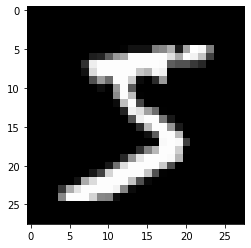

In [13]:
image = x_train[0]
plt.imshow(image, cmap='gray')

In [14]:
y_train[0]

5

Preparing Data for Processing

In [15]:
x_train = x_train.reshape(60000, 784)
x_valid = x_valid.reshape(10000, 784)

In [16]:
x_train.shape

(60000, 784)

In [17]:
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

### Normalizing the Image Data

In [18]:
x_train = x_train / 255
x_valid = x_valid / 255 

In [19]:
x_train.dtype

dtype('float64')

In [21]:
x_train.min()


0.0

In [22]:
x_train.max()

1.0

### Categorical Encoding

In [23]:
num_categories = 10

y_train = keras.utils.to_categorical(y_train, num_categories)
y_valid = keras.utils.to_categorical(y_valid, num_categories)

In [24]:
y_train[0:9]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

## Creating the Model

In [25]:

from tensorflow.keras.models import Sequential

model = Sequential()

In [26]:
from tensorflow.keras.layers import Dense

In [27]:
model.add(Dense(units=512, activation='relu', input_shape=(784,)))

In [28]:
model.add(Dense(units = 512, activation='relu'))

In [29]:
    model.add(Dense(units = 10, activation='softmax'))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [31]:

model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
history = model.fit(
    x_train, y_train, epochs=5, verbose=1, validation_data=(x_valid, y_valid)
)

Epoch 1/5
1875/1875 [==============================] - 13s 6ms/step - loss: 0.1885 - accuracy: 0.9439 - val_loss: 0.0951 - val_accuracy: 0.9731
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0999 - accuracy: 0.9742 - val_loss: 0.1257 - val_accuracy: 0.9714
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0801 - accuracy: 0.9805 - val_loss: 0.1118 - val_accuracy: 0.9757
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0732 - accuracy: 0.9841 - val_loss: 0.1415 - val_accuracy: 0.9748
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0659 - accuracy: 0.9868 - val_loss: 0.1237 - val_accuracy: 0.9796


## ☆ Bonus Exercise ☆


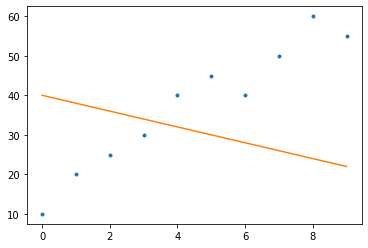

Loss: 475.5


In [33]:
import numpy as np
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt

m = -2  # -2 to start, change me please
b = 40  # 40 to start, change me please

# Sample data
x = np.array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9])
y = np.array([10, 20, 25, 30, 40, 45, 40, 50, 60, 55])
y_hat = x * m + b

plt.plot(x, y, '.')
plt.plot(x, y_hat, '-')
plt.show()

print("Loss:", np.sum((y - y_hat)**2)/len(x))

In [ ]:
# import IPython
# app = IPython.Application.instance()
# app.kernel.do_shutdown(True)